In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel(r"C:\Users\Shreya\Desktop\Product.xlsx")
df=pd.DataFrame(data)
print(df)

                        Modal_Name                      Model_Id  \
0                  Vivobook Gaming                F571GT-BN913TS   
1                Vivobook ultra 14  X413JA-EK261T||X413JA-EB301T   
2                      Vivobook 15                X515JA-EJ322TS   
3                      Macbook Air                     MGN63HN/A   
4                 \nTUF Gaming F15                FX506LH-HN258T   
5                Pavillion Gaming                    15-ec0104AX   
6                       Pavillion                    14-dh1178TU   
7                   X543MA-GQ1015T                X543MA-GQ1015T   
8                     Ideapad S145                    S145-15API   
9                              14s                 14s- DY2501TU   
10                       Ideapad 3                       15ADA05   
11             Predator Helios 300                        G3-572   
12                     14sCeleron                   14s-dq3017TU   
13                        Aspire 7              

In [3]:
df.shape

(53, 20)

In [4]:
data.head()

,Modal_Name,Model_Id,Laptop_Type,Graphic _Processor,Screen_Size in cm,Operating_System,Laptop_Weight in Kg,Usage,Storage in GB,Battery_Life In Hours,Warranty In Years,Storage_type,BRAND,RAM,Processor_Name,Price,Screen_resolution,Processor_Brand,Rating,Specs Profile
0,Vivobook Gaming,F571GT-BN913TS,Gaming,\nNVIDIA GeForce GTX 1650,39.62,Windows 10 home,2.14,"Gaming, Processing & Multitasking",512,15,1,SSD,ASUS,8,Core i5,54990,1920 x 1080 Pixels,Intel,4.0,Gaming NVIDIAGeForceGTX1650 39.62 Windows10ho...
1,Vivobook ultra 14,X413JA-EK261T||X413JA-EB301T,Thin and Light laptop,Intel Integrated UHD,35.56,Windows 10 home,1.4,Processing and Multitasking,512,24,1,SSD,ASUS,4,Core i3,39990,1920 x 1080 Pixels,Intel,5.0,ThinandLightlaptop IntelIntegratedUHD 35.56 Wi...
2,Vivobook 15,X515JA-EJ322TS,Thin and Light Laptop,Intel Integrated UHD,39.62,Windows 10 home,1.8,Processing and Multi tasking,1000,5,1,HDD,ASUS,8,Core i3,40090,1920 x 1080 Pixel,Intel,5.0,ThinandLightLaptop IntelIntegratedUHD 39.62 Wi...
3,Macbook Air,MGN63HN/A,Thin and Light Laptop,NaN,33.78,MAC OS Big Sur,1.29,Processing and Multi tasking,256,15,1,SSD,Apple,8,M1,88990,2560 x 1600 Pixel,Apple,4.0,ThinandLightLaptop NA 33.78 MACOSBigSur 1.29 2...
4,\nTUF Gaming F15,FX506LH-HN258T,Gaming,NVIDIA GeForce GTX 1650,39.62,Windows 10 home,2.3,"Gaming, Processing & Multitasking",512,7,1,SSD,ASUS,8,Core i5,61990,\n1920x1080 Pixels,Intel,5.0,Gaming NVIDIAGeForceGTX1650 39.62 Windows10ho...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Modal_Name             53 non-null     object 
 1   Model_Id               53 non-null     object 
 2   Laptop_Type            53 non-null     object 
 3   Graphic _Processor     51 non-null     object 
 4   Screen_Size in cm      53 non-null     object 
 5   Operating_System       53 non-null     object 
 6   Laptop_Weight in Kg    53 non-null     object 
 7   Usage                  53 non-null     object 
 8   Storage in GB          53 non-null     object 
 9   Battery_Life In Hours  53 non-null     object 
 10  Warranty In Years      53 non-null     object 
 11  Storage_type           53 non-null     object 
 12  BRAND                  53 non-null     object 
 13  RAM                    53 non-null     object 
 14  Processor_Name         53 non-null     object 
 15  Price   

In [6]:
#Content based recommendation

data.head(1)[ 'Specs Profile']

0    Gaming NVIDIAGeForceGTX1650 39.62  Windows10ho...
Name: Specs Profile, dtype: object

In [7]:
#NLP concept:  TF-IDF(Creates Matrix)

from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
data['Specs Profile'] = data['Specs Profile'].fillna('')



In [8]:
# Fitting the TF-IDF on the 'Specs Profile' text (converts into sparse matrix)
tfv_matrix = tfv.fit_transform(data['Specs Profile'])

In [9]:
tfv_matrix 

<53x160 sparse matrix of type '<class 'numpy.float64'>'
	with 1381 stored elements in Compressed Sparse Row format>

In [10]:
tfv_matrix.shape

(53, 160)

In [11]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [12]:
sig[0]

array([0.76420653, 0.7621899 , 0.76206769, 0.76187225, 0.76342753,
       0.7627422 , 0.76206493, 0.76214525, 0.76201999, 0.76178076,
       0.7618119 , 0.76205477, 0.76180079, 0.76226935, 0.76226935,
       0.76227378, 0.76205304, 0.76233045, 0.76175621, 0.7618437 ,
       0.76188561, 0.76202337, 0.76229801, 0.7621627 , 0.76267669,
       0.7620035 , 0.76174171, 0.76210062, 0.76202162, 0.76231338,
       0.76246852, 0.76214893, 0.76178354, 0.76205843, 0.76177232,
       0.76180722, 0.76173555, 0.76192401, 0.76204829, 0.76188537,
       0.76251623, 0.76265659, 0.76234377, 0.76223474, 0.76202687,
       0.76183271, 0.76169488, 0.76167019, 0.7623176 , 0.76258132,
       0.76211136, 0.76194011, 0.76230141])

In [13]:
# Reverse mapping of indices and   modal names
indices = pd.Series(data.index, index=data['Modal_Name'])

In [14]:
indices

Modal_Name
Vivobook Gaming                    0
Vivobook ultra 14                  1
Vivobook 15                        2
Macbook Air                        3
\nTUF Gaming F15                   4
Pavillion Gaming                   5
Pavillion                          6
X543MA-GQ1015T                     7
Ideapad S145                       8
14s                                9
Ideapad 3                         10
Predator Helios 300               11
14sCeleron                        12
Aspire 7                          13
15s                               14
Lenovo I5                         15
Surface Go                        16
PureBook X14                      17
Mi Notebook Horizon Edition 14    18
MI Notebook 14                    19
Chromebook                        20
Victus  HP                        21
HP Pavilion 11Gen                 22
HP 15                             23
HP Pavilion Gaming                24
HP 15 (2021)                      25
MacBook                    

In [15]:
indices['Inspiron 5410']
sig[6764]

IndexError: index 6764 is out of bounds for axis 0 with size 53

In [16]:
list(enumerate(sig[indices['Inspiron 5410']]))

[(0, 0.761924007639651),
 (1, 0.7623074629500286),
 (2, 0.761878075594152),
 (3, 0.7616757312491269),
 (4, 0.761919255575604),
 (5, 0.7617823991671573),
 (6, 0.7624098881532928),
 (7, 0.762035009711462),
 (8, 0.761787272553621),
 (9, 0.761861309662601),
 (10, 0.7616660622766708),
 (11, 0.7620503680839751),
 (12, 0.7618899879385832),
 (13, 0.761670545603324),
 (14, 0.761670545603324),
 (15, 0.7618530657683367),
 (16, 0.7618671807197843),
 (17, 0.7620455556367204),
 (18, 0.7625240589126018),
 (19, 0.7624595049417029),
 (20, 0.7619280927166108),
 (21, 0.7617834855654639),
 (22, 0.7621691379556819),
 (23, 0.7625227985766432),
 (24, 0.7618487272065406),
 (25, 0.7620211208471248),
 (26, 0.76171878093996),
 (27, 0.7620181313220928),
 (28, 0.7623665487989053),
 (29, 0.7622100968081726),
 (30, 0.7618223944326806),
 (31, 0.7622327714908318),
 (32, 0.7626174827867648),
 (33, 0.7621225138360717),
 (34, 0.7622550726352995),
 (35, 0.7617847407956574),
 (36, 0.7625165591942231),
 (37, 0.7642065267859

In [17]:
sorted(list(enumerate(sig[indices['Inspiron 5410']])), key=lambda x: x[1], reverse=True)

[(37, 0.7642065267859618),
 (39, 0.7639376929603316),
 (50, 0.7628202434201294),
 (40, 0.762689613529358),
 (32, 0.7626174827867648),
 (18, 0.7625240589126018),
 (23, 0.7625227985766432),
 (36, 0.7625165591942231),
 (19, 0.7624595049417029),
 (6, 0.7624098881532928),
 (46, 0.7624029189819468),
 (45, 0.7623944535719662),
 (28, 0.7623665487989053),
 (1, 0.7623074629500286),
 (44, 0.7622995244578151),
 (34, 0.7622550726352995),
 (31, 0.7622327714908318),
 (29, 0.7622100968081726),
 (22, 0.7621691379556819),
 (49, 0.7621582489372674),
 (33, 0.7621225138360717),
 (43, 0.7620734945469344),
 (42, 0.7620677356800529),
 (11, 0.7620503680839751),
 (17, 0.7620455556367204),
 (7, 0.762035009711462),
 (48, 0.7620273896882368),
 (25, 0.7620211208471248),
 (27, 0.7620181313220928),
 (52, 0.7619984234752637),
 (38, 0.7619743694262475),
 (20, 0.7619280927166108),
 (0, 0.761924007639651),
 (4, 0.761919255575604),
 (41, 0.7619026177332116),
 (12, 0.7618899879385832),
 (2, 0.761878075594152),
 (16, 0.7618

In [18]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the laptops modals
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar Laptops
    sig_scores = sig_scores[1:10]
    print(sig_scores)
    # laptop indices
    Product_indices = [i[0] for i in sig_scores]

    # Top 10 most similar laptops
    return data['Modal_Name'].iloc[Product_indices]

In [19]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Inspiron 5410')

[(39, 0.7639376929603316), (50, 0.7628202434201294), (40, 0.762689613529358), (32, 0.7626174827867648), (18, 0.7625240589126018), (23, 0.7625227985766432), (36, 0.7625165591942231), (19, 0.7624595049417029), (6, 0.7624098881532928)]


39                 ‎INSPIRON 14 5000
50                    Razer Blade 15
40                     ‎DELL G3 3500
32                       Vostro 3401
18    Mi Notebook Horizon Edition 14
23                             HP 15
36                          Inspiron
19                    MI Notebook 14
6                         Pavillion 
Name: Modal_Name, dtype: object

In [20]:
#Product pupularity based system
import pandas as pd
data1=pd.read_excel(r"C:\Users\Shreya\Desktop\Products _50.xlsx")
df=pd.DataFrame(data1,columns=['Rev_text','review','Model Id','Rating'])                             
print(df)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Shreya\\Desktop\\Products _50.xlsx'

In [21]:
popular_products = pd.DataFrame(df.groupby('Model Id')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

KeyError: 'Model Id'

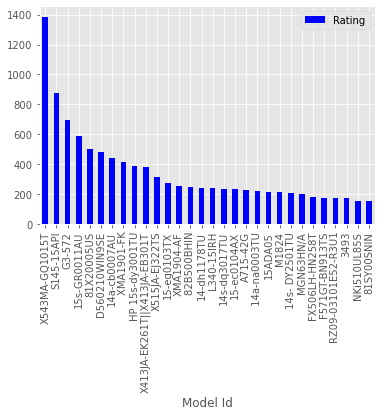

In [61]:
most_popular.head(30).plot(kind = "bar",color='Blue')

In [ ]:
#Analysis:
#The above graph gives us the most popular products (arranged in descending order) 
#For eaxmple, product, ID #X543MA-GQ1015T has ratings of over 14000, the next most popular product, ID # S145-15API has ratings between 800 and 1000 etc.